In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
data = pd.read_csv('sales_timeseries.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True, drop=True, append=False)
data.index.name = None
data

,TotalSales
2022-01-01,934.137692
2022-01-02,674.789014
2022-01-03,1105.534033
2022-01-04,1113.770660
2022-01-05,858.990135
...,...
2022-12-27,1420.403449
2022-12-28,876.885462
2022-12-29,1158.683086
2022-12-30,1073.844337


<Axes: title={'center': 'Daily Total Sales'}>

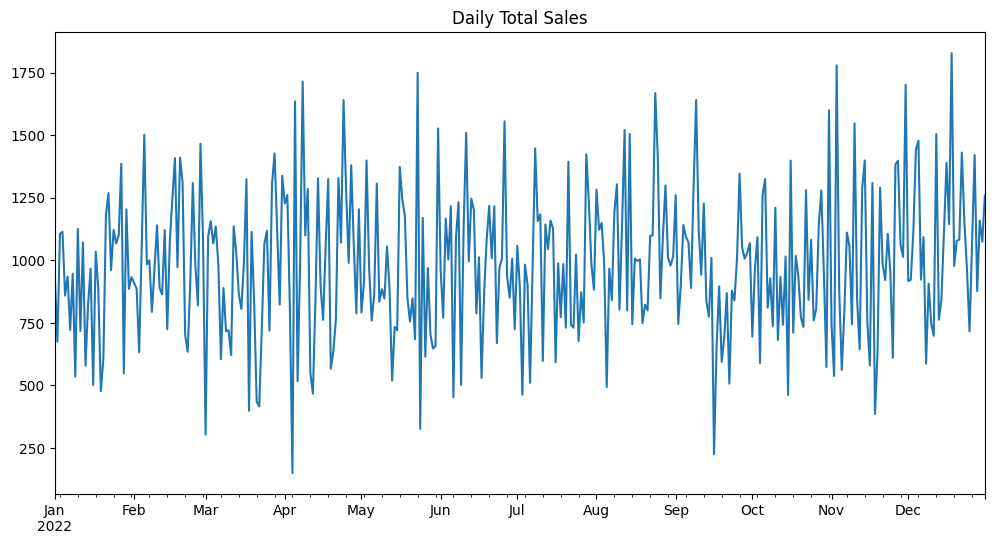

In [18]:
# Time Series Visualization
data['TotalSales'].plot(title='Daily Total Sales', figsize=(12, 6))

,TotalSales,MA_7
2022-01-01,934.137692,NaN
2022-01-02,674.789014,NaN
2022-01-03,1105.534033,NaN
2022-01-04,1113.770660,NaN
2022-01-05,858.990135,NaN
...,...,...
2022-12-27,1420.403449,1119.998243
2022-12-28,876.885462,1090.598994
2022-12-29,1158.683086,1051.765890
2022-12-30,1073.844337,1040.576269


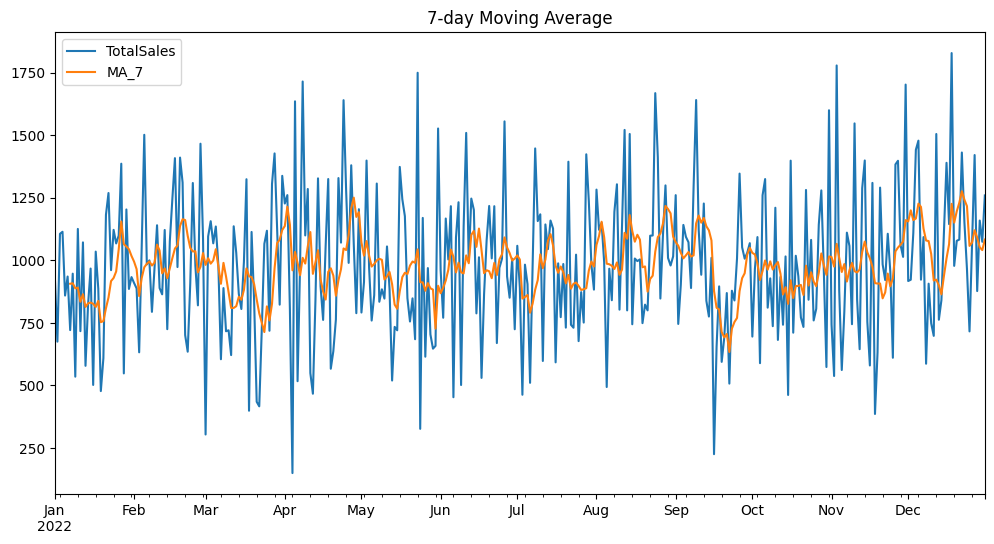

In [19]:
# Moving Average
data['MA_7'] = data['TotalSales'].rolling(window=7).mean()
data[['TotalSales', 'MA_7']].plot(title='7-day Moving Average', figsize=(12, 6))
data

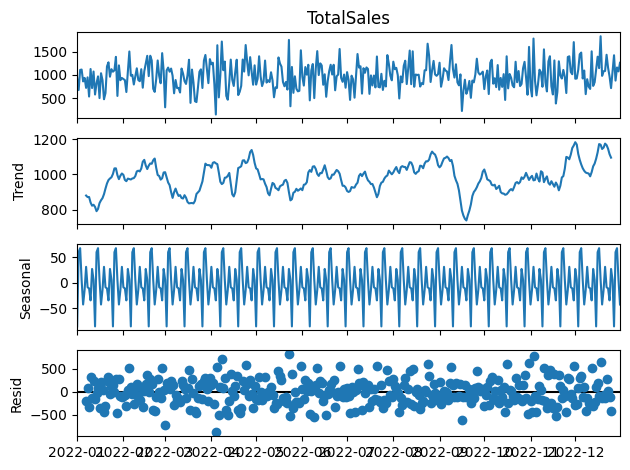

In [20]:
# Seasonal Decomposition
result = seasonal_decompose(data['TotalSales'], model='additive', period=12)
result.plot()
plt.show()

Augmented Dickey-Fuller (ADF) test. The purpose of this test is to determine whether the time series is stationary or not.

ADF Statistic: The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root. In other words, a highly negative value suggests stationarity.  
p-value: A p-value below a threshold (commonly 0.05) suggests that the null hypothesis (that the time series has a unit root and is non-stationary) can be rejected.

In [21]:
# Statistical Test for Stationarity
result_adf = adfuller(data['TotalSales'])
print('ADF Statistic: %f' % result_adf[0])
print('p-value: %f' % result_adf[1])

ADF Statistic: -10.098227
p-value: 0.000000


C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


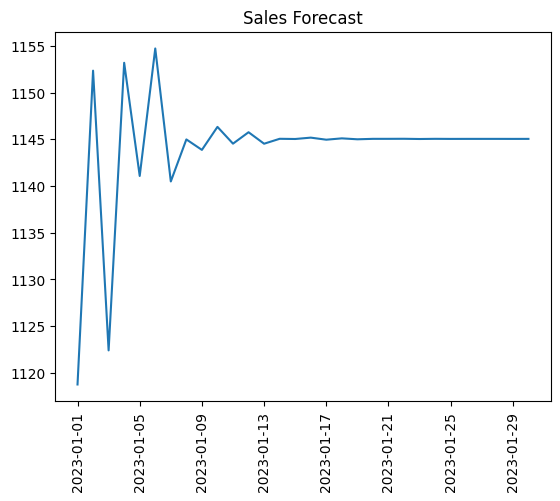

In [22]:
# Using SARIMAX for ARIMA modeling
model = SARIMAX(data['TotalSales'], order=(5,1,0), seasonal_order=(0,0,0,0))
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=30)

# Plot Forecast
plt.plot(forecast)
plt.title('Sales Forecast')
plt.xticks(rotation=90)
plt.show()

Autoregressive Integrated Moving Average (ARIMA) Forecasting

In [23]:
ts = pd.Series(data['TotalSales'])

In [24]:
ts

2022-01-01     934.137692
2022-01-02     674.789014
2022-01-03    1105.534033
2022-01-04    1113.770660
2022-01-05     858.990135
                 ...     
2022-12-27    1420.403449
2022-12-28     876.885462
2022-12-29    1158.683086
2022-12-30    1073.844337
2022-12-31    1259.055898
Name: TotalSales, Length: 365, dtype: float64

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


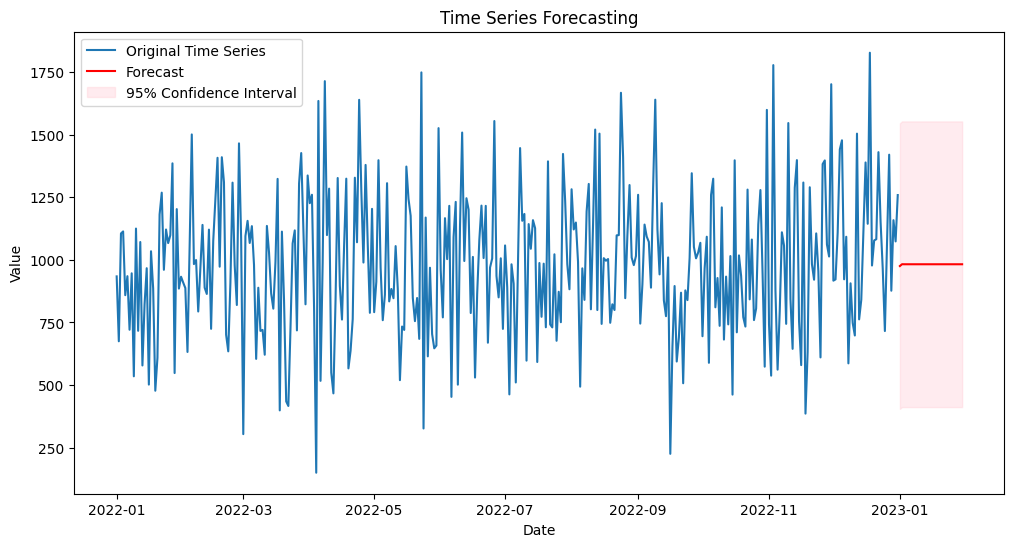

In [25]:
# Fit an ARIMA model
model = sm.tsa.ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Forecast future values
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

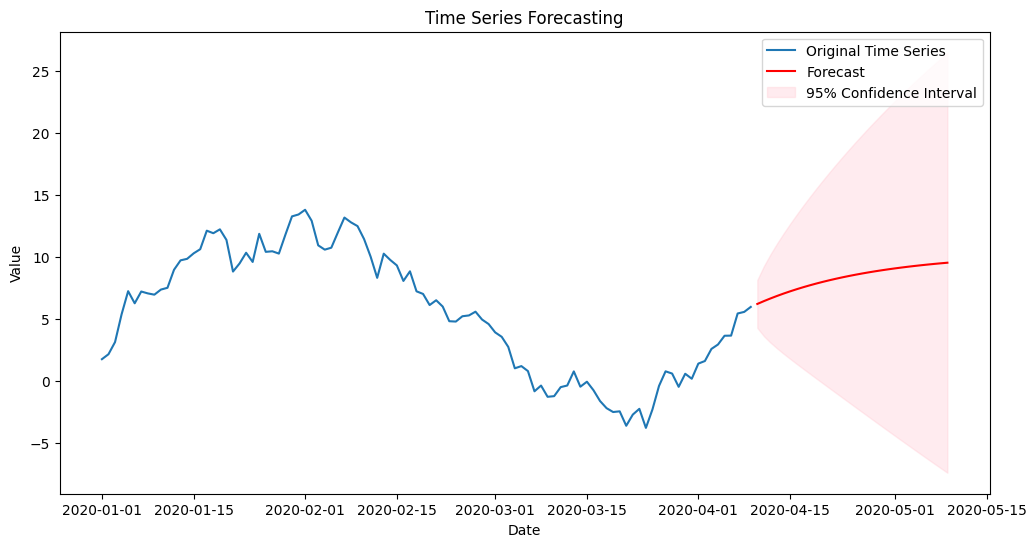

In [1]:
# Sample data generation for demonstration
np.random.seed(0)
data = pd.date_range(start='2020-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(100).cumsum(), index=data)

# Fit an ARIMA model
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()

# Forecast future values
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original time series and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series')
plt.plot(pd.date_range(start=ts.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Anomaly Detection:

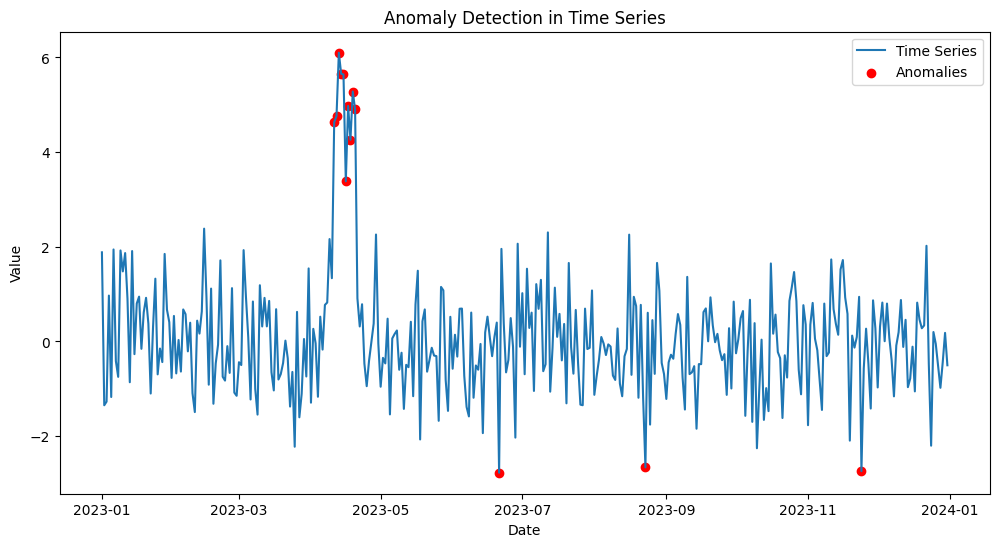

In [2]:
# Generate a sample time series dataset with an anomaly
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
time_series_data = np.random.randn(len(date_rng))
time_series_data[100:110] += 5  # Introduce an anomaly
ts = pd.Series(time_series_data, index=date_rng)

# Calculate z-scores for the data
z_scores = zscore(ts)

# Set a threshold for anomaly detection
threshold = 2.0

# Detect anomalies
anomalies = ts[abs(z_scores) > threshold]

# Plot the time series with detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Time Series')
plt.scatter(anomalies.index, anomalies.values, color='red', marker='o', label='Anomalies')
plt.title('Anomaly Detection in Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()